# 1. Loading Data:
Load the movie metadata from the `movies.dat` file and ratings from `ratings.dat`.
- Both files use '::' as the delimiter.
- The files have no header.
- The encoding for both files is ISO-8859-1.

In [1]:
import pandas as pd

MOVIES = pd.read_csv(
    "movies.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="ISO-8859-1",
    names=["movie_id", "title", "genres"],
    index_col="movie_id",
)
RATINGS = pd.read_csv(
    "ratings.dat",
    sep="::",
    engine="python",
    header=None,
    encoding="ISO-8859-1",
    names=["user_id", "movie_id", "rating", "timestamp"],
)

In [2]:
MOVIES.head()

title                        genres
movie_id                                                                  
1                           Toy Story (1995)   Animation|Children's|Comedy
2                             Jumanji (1995)  Adventure|Children's|Fantasy
3                    Grumpier Old Men (1995)                Comedy|Romance
4                   Waiting to Exhale (1995)                  Comedy|Drama
5         Father of the Bride Part II (1995)                        Comedy

In [3]:
RATINGS.head()

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [4]:
RATINGS["user_id"].nunique(), RATINGS["movie_id"].nunique()

(6040, 3706)

# 2. Building User-Item Interaction Matrix and Learning Latent Factors:
## 2.1. Building User-Item Interaction Matrix:
Use the ratings data to build a [sparse matrix](https://docs.scipy.org/doc/scipy/tutorial/sparse.html) where rows represent users and columns represent movies, with ratings as values.

In [5]:
from scipy.sparse import coo_matrix

RATINGS_SPARSE = coo_matrix((RATINGS["rating"], (RATINGS["user_id"], RATINGS["movie_id"])))

RATINGS_SPARSE.shape

(6041, 3953)

## 2.2. Learning Latent Factors:
Choose an algorithm (e.g., [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)) to learn latent factors for movies.
Fit the chosen model to the user-item interaction matrix to obtain the latent factors.

In [6]:
from sklearn.decomposition import NMF

model = NMF(n_components=10)
model.fit(RATINGS_SPARSE)
USERS_LATENT = model.transform(RATINGS_SPARSE)
MOVIES_LATENT = model.components_

USERS_LATENT.shape[0], MOVIES_LATENT.shape[1]

(6041, 3953)

## 2.3. Exploring Latent Space and Plotting Movies:
Utilize [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the learned latent factors and visualize them in a 2D plot.
Label the movies with their genres.

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
MOVIES_TSNE = tsne.fit_transform(MOVIES_LATENT.T)

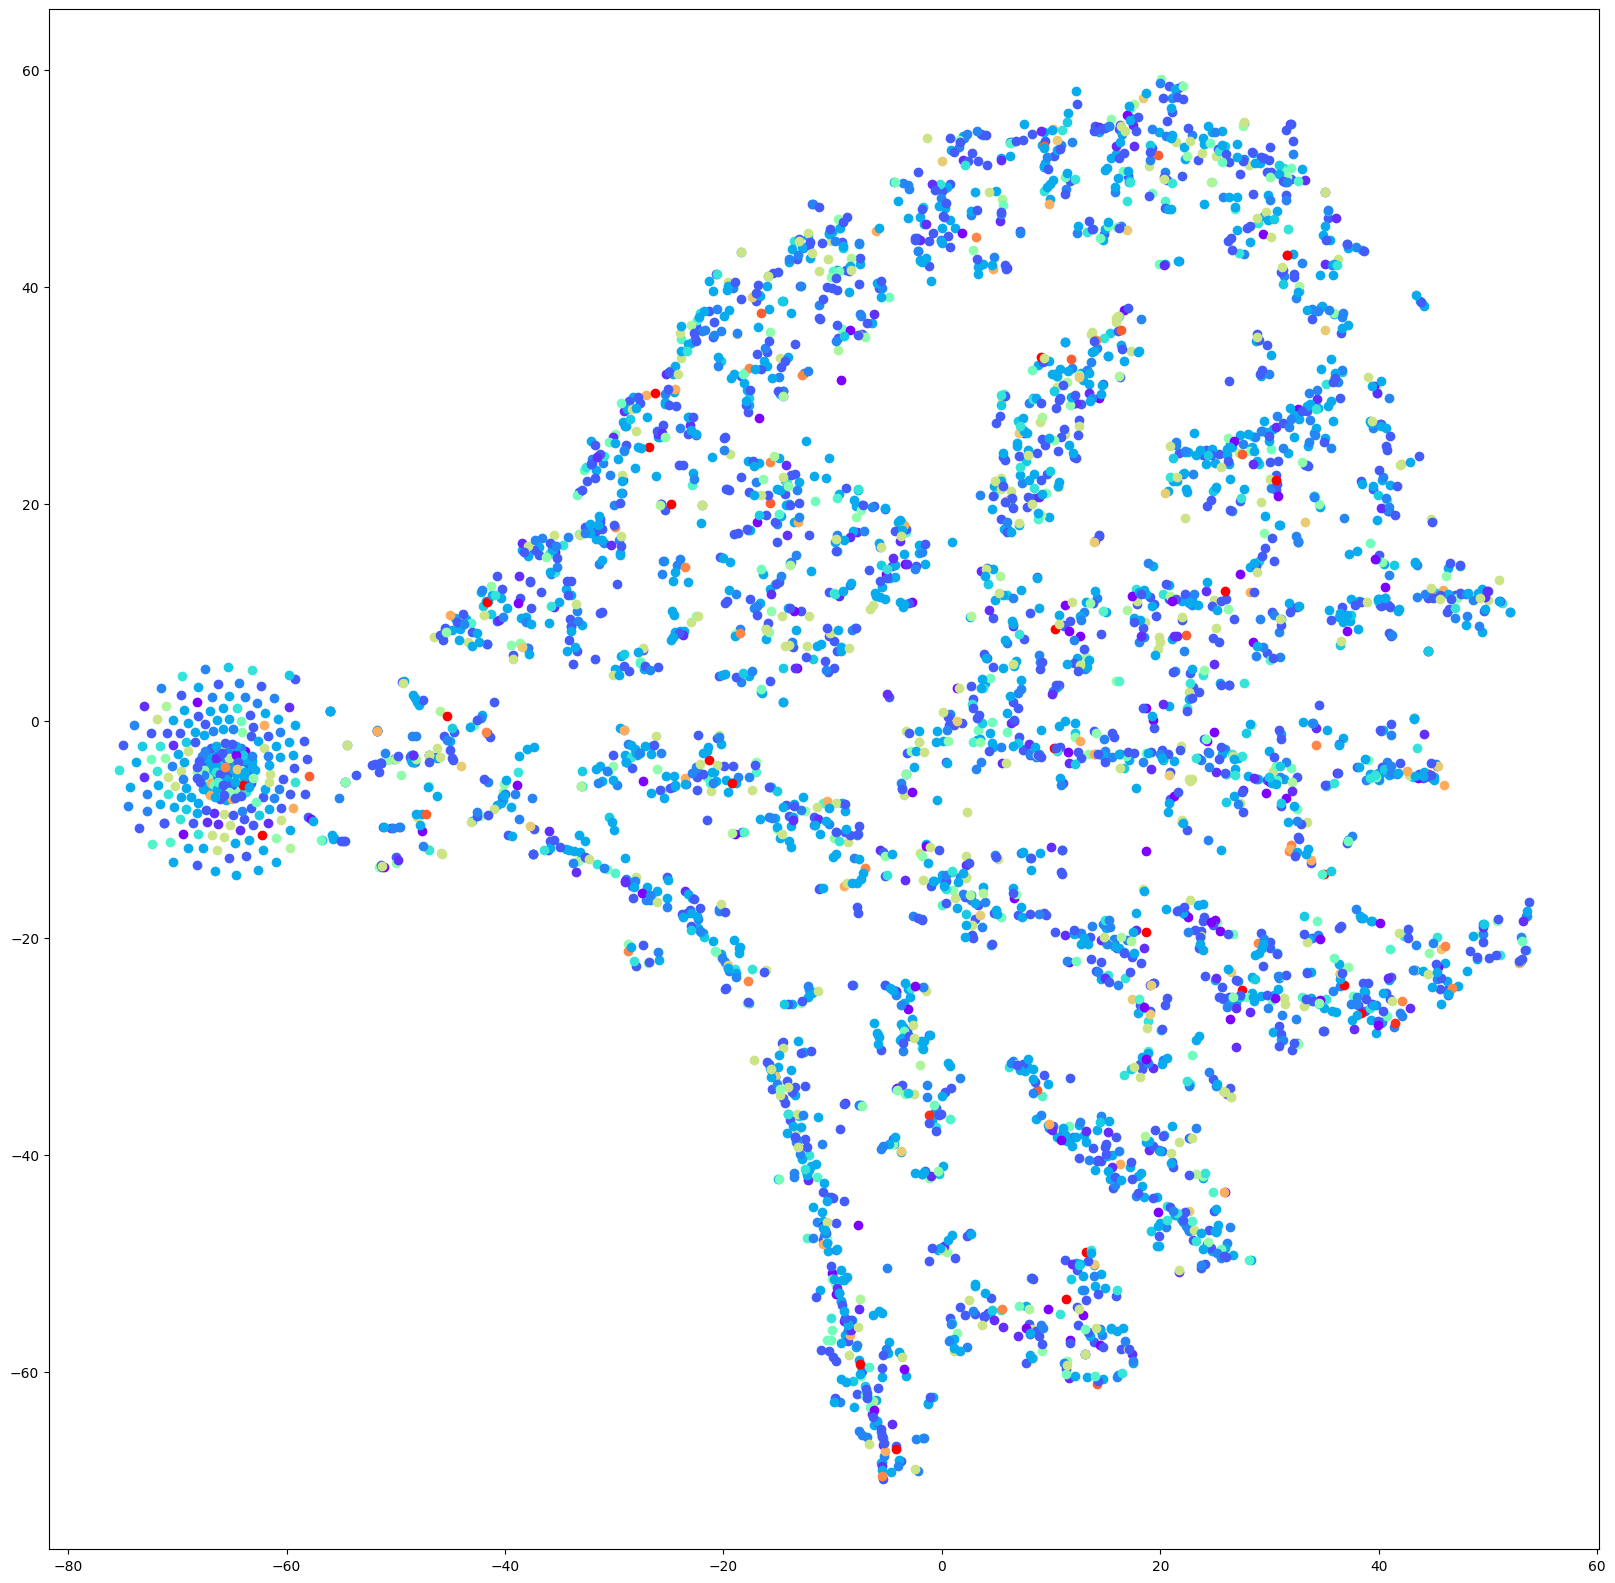

In [9]:
import matplotlib.pyplot as plt
import numpy as np

GENRES = MOVIES["genres"].apply(lambda x: x.split("|")[0]).unique()
COLORS = plt.cm.rainbow(np.linspace(0, 1, len(GENRES)))
GENRE_TO_COLOR = dict(zip(GENRES, COLORS))

for i, movie_id in enumerate(MOVIES.index):
    GENRE = MOVIES.loc[movie_id, "genres"].split("|")[0]
    plt.scatter(MOVIES_TSNE[i, 0], MOVIES_TSNE[i, 1], color=GENRE_TO_COLOR[GENRE])

plt.show()

## 2.4. Drawing Insights from the Plot:
Analyze the clustering of movies in the latent space.
Observe if movies of similar genres are grouped together.

# 3. Building a Recommendation System:
## 3.1. Using Latent Factors:
Utilize the learned latent factors to build a recommendation system.
Employ a similarity measure (e.g., cosine similarity) to find similar movies based on latent factors. You can use the sklearn [nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) implementation.


In [ ]:
# ...

## 3.2. Recommending Movies:
Recommend 5 movies for some selected movies (e.g., "Star Wars: Episode IV - A New Hope (1977)", "Lion King, The (1994)").

In [ ]:
# ...